<a href="https://colab.research.google.com/github/JohnKim0911/100_Analyse_Deaths_involving_Police_in_the_United_States/blob/main/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 23.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

In [ ]:
us_states = pd.read_csv('us_states.csv')
us_states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
us_states.tail()

,State,Abbreviation
46,Virginia,VA
47,Washington,WA
48,West Virginia,WV
49,Wisconsin,WI
50,Wyoming,WY


# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667
...,...,...,...
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500


In [ ]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [ ]:
df_hh_income.duplicated().values.any()

False

In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [ ]:
df_pct_poverty.duplicated().values.any()

False

In [ ]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_pct_completed_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [ ]:
df_pct_completed_hs.duplicated().values.any()

False

In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [ ]:
df_share_race_city.duplicated().values.any()

False

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
df_fatalities.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
# I think it's better not to fill up with 0.

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4


In [ ]:
df_pct_poverty.describe()

,Geographic Area,City,poverty_rate
count,29329,29329,29329
unique,51,24255,771
top,PA,Franklin city,0
freq,1762,16,1464


In [ ]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.poverty_rate

0        78.8
1        29.1
2        25.5
3        30.7
4          42
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328       0
Name: poverty_rate, Length: 29329, dtype: object

In [ ]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.astype(str).str.replace('-', "")

In [ ]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)
df_pct_poverty.poverty_rate

0       78.80
1       29.10
2       25.50
3       30.70
4       42.00
         ... 
29324   18.60
29325   15.30
29326    5.90
29327    5.40
29328    0.00
Name: poverty_rate, Length: 29329, dtype: float64

In [ ]:
poverty_rate_by_state = df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_rate_by_state.head()

,Geographic Area,poverty_rate
0,AK,19.85
1,AL,20.65
2,AR,22.96
3,AZ,25.67
4,CA,17.12


In [ ]:
poverty_rate_by_state.tail()

,Geographic Area,poverty_rate
46,VT,13.79
47,WA,15.02
48,WI,12.86
49,WV,21.13
50,WY,9.89


In [ ]:
us_states.head()

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
us_states.rename(columns={'Abbreviation': 'Geographic Area'}, inplace=True)
us_states.head()

,State,Geographic Area
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
merged_df_poverty_rate_by_state = pd.merge(us_states, poverty_rate_by_state, on='Geographic Area')
merged_df_poverty_rate_by_state.head()

,State,Geographic Area,poverty_rate
0,Alabama,AL,20.65
1,Alaska,AK,19.85
2,Arizona,AZ,25.67
3,Arkansas,AR,22.96
4,California,CA,17.12


In [ ]:
merged_df_poverty_rate_by_state = merged_df_poverty_rate_by_state.sort_values('poverty_rate', ascending=False)
merged_df_poverty_rate_by_state

,State,Geographic Area,poverty_rate
36,Mississippi,MS,26.88
2,Arizona,AZ,25.67
10,Georgia,GA,23.78
25,New Mexico,NM,23.08
3,Arkansas,AR,22.96
18,Louisiana,LA,22.34
40,South Carolina,SC,22.16
48,West Virginia,WV,21.13
30,Oklahoma,OK,20.66
0,Alabama,AL,20.65


In [ ]:
bar = px.bar(x = merged_df_poverty_rate_by_state.State,
             y = merged_df_poverty_rate_by_state.poverty_rate,
             title='Poverty Rate by US State')

bar.update_layout(xaxis_title='State',
                  yaxis_title='Poverty Rate')

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6
...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4


In [ ]:
df_pct_completed_hs['percent_completed_hs']

0        21.2
1        69.1
2        78.9
3        81.4
4        68.6
         ... 
29324     100
29325    85.6
29326    89.2
29327    79.4
29328     100
Name: percent_completed_hs, Length: 29329, dtype: object

In [ ]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.astype(str).str.replace('-','')

In [ ]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)
df_pct_completed_hs.percent_completed_hs

0        21.20
1        69.10
2        78.90
3        81.40
4        68.60
         ...  
29324   100.00
29325    85.60
29326    89.20
29327    79.40
29328   100.00
Name: percent_completed_hs, Length: 29329, dtype: float64

In [ ]:
high_school_graduation_rate_by_state = df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs': pd.Series.mean})
high_school_graduation_rate_by_state.head()

,Geographic Area,percent_completed_hs
0,AK,84.63
1,AL,80.30
2,AR,79.95
3,AZ,80.47
4,CA,81.96


In [ ]:
merged_df_high_school_graduation_rate_by_state = pd.merge(us_states, high_school_graduation_rate_by_state, on='Geographic Area')
merged_df_high_school_graduation_rate_by_state.head()

,State,Geographic Area,percent_completed_hs
0,Alabama,AL,80.30
1,Alaska,AK,84.63
2,Arizona,AZ,80.47
3,Arkansas,AR,79.95
4,California,CA,81.96


In [ ]:
merged_df_high_school_graduation_rate_by_state = merged_df_high_school_graduation_rate_by_state.sort_values('percent_completed_hs', ascending=True)
merged_df_high_school_graduation_rate_by_state

,State,Geographic Area,percent_completed_hs
43,Texas,TX,75.69
36,Mississippi,MS,78.47
10,Georgia,GA,79.01
18,Louisiana,LA,79.29
3,Arkansas,AR,79.95
0,Alabama,AL,80.30
2,Arizona,AZ,80.47
40,South Carolina,SC,80.85
25,New Mexico,NM,80.98
42,Tennessee,TN,81.63


In [ ]:
bar = px.bar(x = merged_df_high_school_graduation_rate_by_state.State,
             y = merged_df_high_school_graduation_rate_by_state.percent_completed_hs,
             title='High School Graduation Rate by US State')

bar.update_layout(xaxis_title='State',
                  yaxis_title='Percentage of Graduation')

bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
merged_df_poverty_rate_and_high_school_graduation_rate = pd.merge(merged_df_poverty_rate_by_state, merged_df_high_school_graduation_rate_by_state, on=['State', 'Geographic Area'])
merged_df_poverty_rate_and_high_school_graduation_rate

,State,Geographic Area,poverty_rate,percent_completed_hs
0,Mississippi,MS,26.88,78.47
1,Arizona,AZ,25.67,80.47
2,Georgia,GA,23.78,79.01
3,New Mexico,NM,23.08,80.98
4,Arkansas,AR,22.96,79.95
5,Louisiana,LA,22.34,79.29
6,South Carolina,SC,22.16,80.85
7,West Virginia,WV,21.13,82.35
8,Oklahoma,OK,20.66,82.91
9,Alabama,AL,20.65,80.30


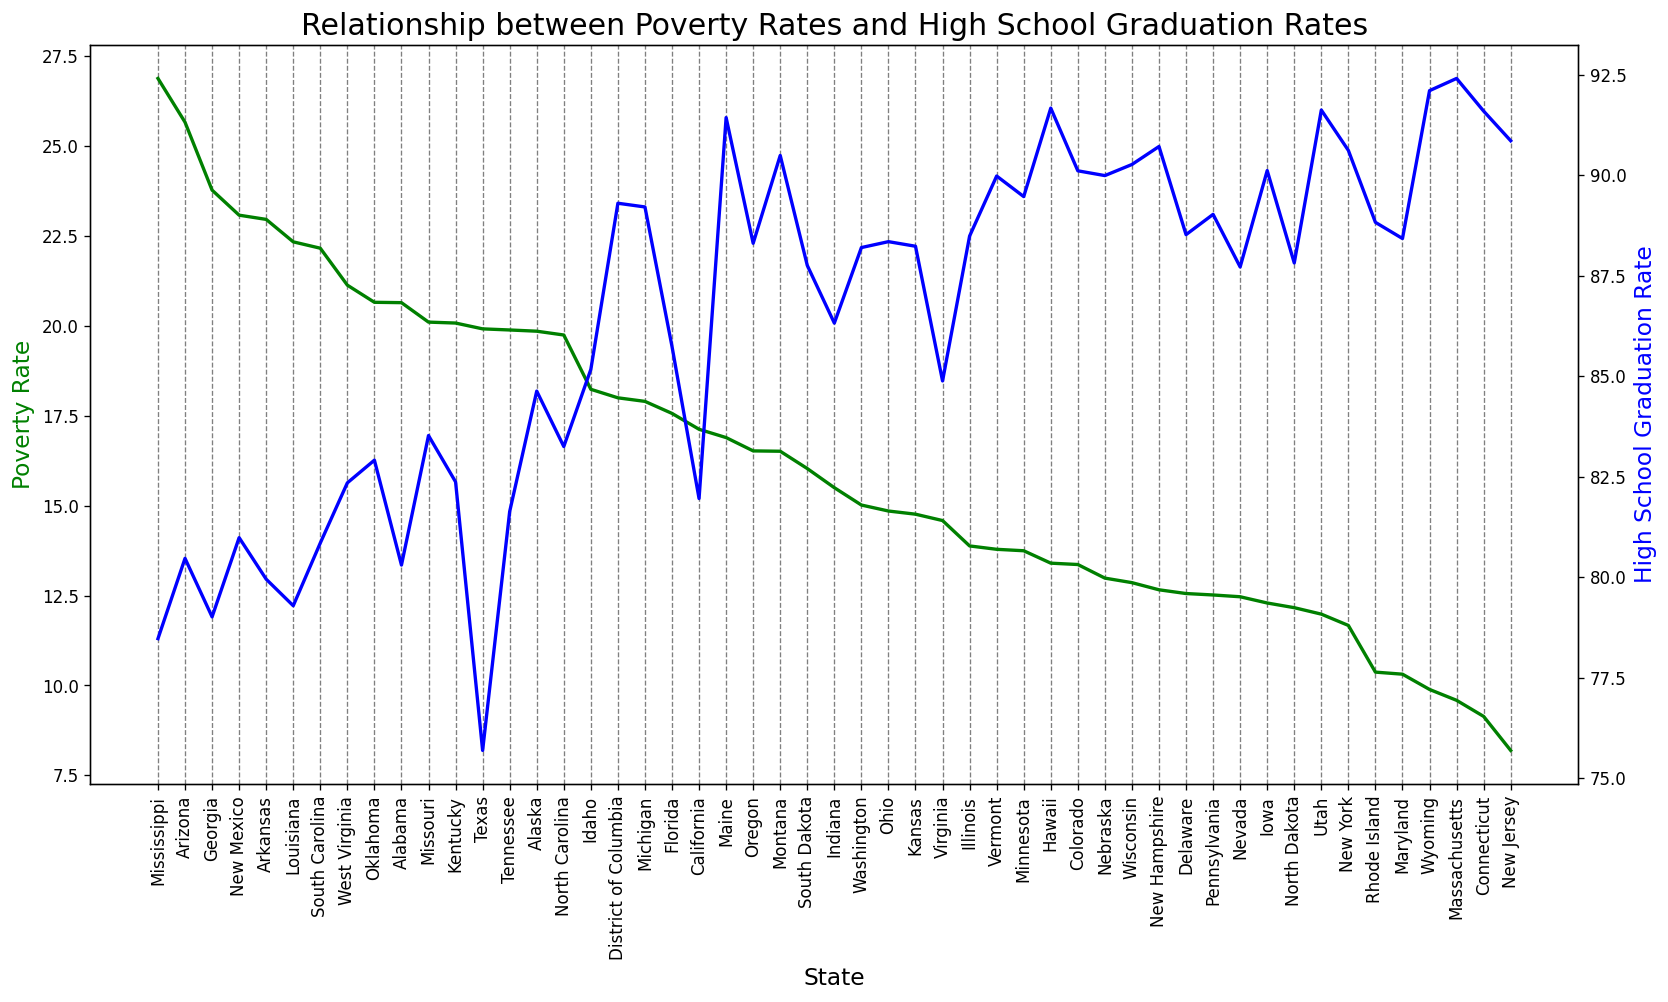

In [ ]:
plt.figure(figsize=(16,8), dpi=120)
plt.title('Relationship between Poverty Rates and High School Graduation Rates', fontsize=18)
plt.xticks(rotation=90)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel('State', fontsize=14)
ax1.set_ylabel('Poverty Rate', color='green', fontsize=14)
ax2.set_ylabel('High School Graduation Rate', color='blue', fontsize=14)

ax1.grid(axis='x', color='grey', linestyle='--')

ax1.plot(merged_df_poverty_rate_and_high_school_graduation_rate.State, merged_df_poverty_rate_and_high_school_graduation_rate.poverty_rate, color='green', linewidth=2)
ax2.plot(merged_df_poverty_rate_and_high_school_graduation_rate.State, merged_df_poverty_rate_and_high_school_graduation_rate.percent_completed_hs, color='blue', linewidth=2)

plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates
# Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

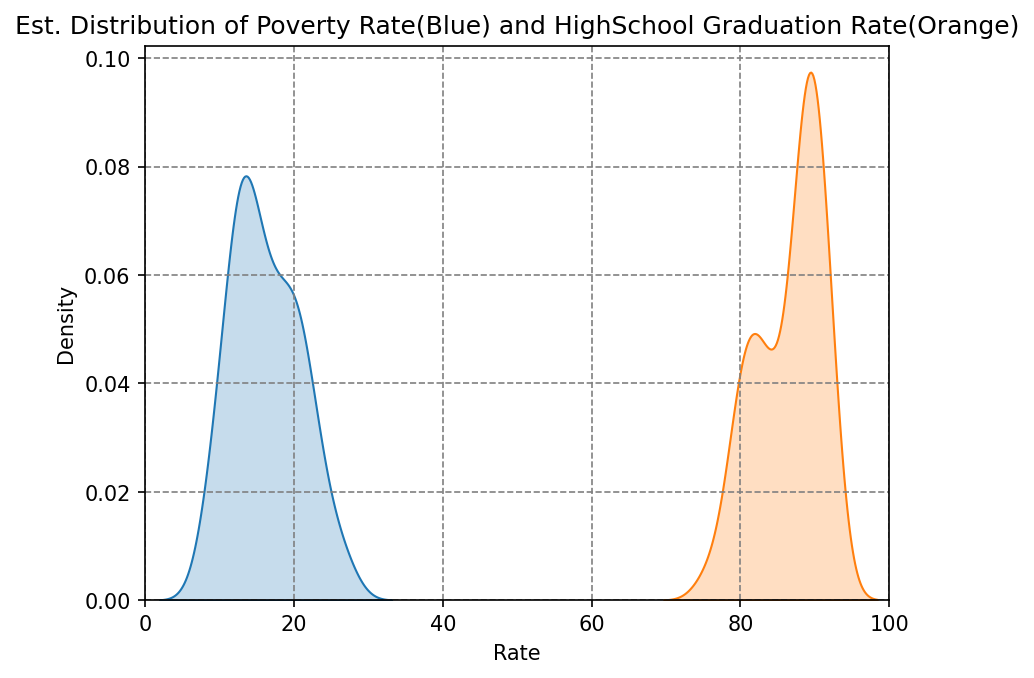

In [ ]:
plt.figure(dpi=150)

plt.xlabel('Rate')

poverty_rate = sns.kdeplot(merged_df_poverty_rate_and_high_school_graduation_rate.poverty_rate,
                           fill=True)
percent_completed_hs = sns.kdeplot(merged_df_poverty_rate_and_high_school_graduation_rate.percent_completed_hs,
                                   fill=True)

plt.title('Est. Distribution of Poverty Rate(Blue) and HighSchool Graduation Rate(Orange)')
plt.xlim(0, 100)

plt.grid(color='grey', linestyle='--')

plt.show()

In [ ]:
merged_df_poverty_rate_and_high_school_graduation_rate.poverty_rate.describe()

count   51.00
mean    16.24
std      4.56
min      8.19
25%     12.61
50%     15.50
75%     19.90
max     26.88
Name: poverty_rate, dtype: float64

In [ ]:
merged_df_poverty_rate_and_high_school_graduation_rate.percent_completed_hs.describe()

count   51.00
mean    86.50
std      4.38
min     75.69
25%     82.64
50%     88.23
75%     90.05
max     92.40
Name: percent_completed_hs, dtype: float64

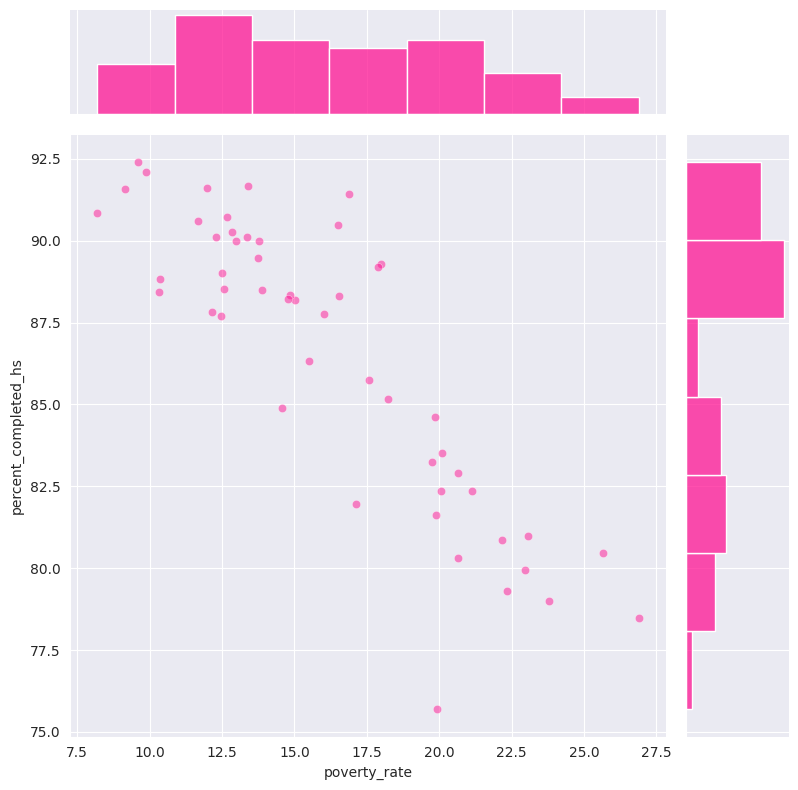

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=merged_df_poverty_rate_and_high_school_graduation_rate.poverty_rate,
                y=merged_df_poverty_rate_and_high_school_graduation_rate.percent_completed_hs,
                height=8,
                kind='scatter',
                color='deeppink',
                joint_kws={'alpha':0.5})

plt.show()

<Figure size 960x720 with 0 Axes>

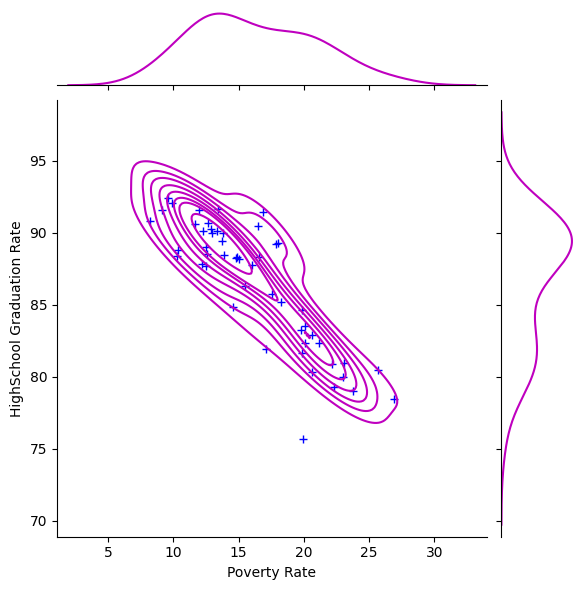

In [ ]:
plt.figure(dpi=150)

g = sns.jointplot(x="poverty_rate", y="percent_completed_hs", data=merged_df_poverty_rate_and_high_school_graduation_rate, kind="kde", color="m")
g.plot_joint(plt.scatter, c="b", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Poverty Rate", "HighSchool Graduation Rate")

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

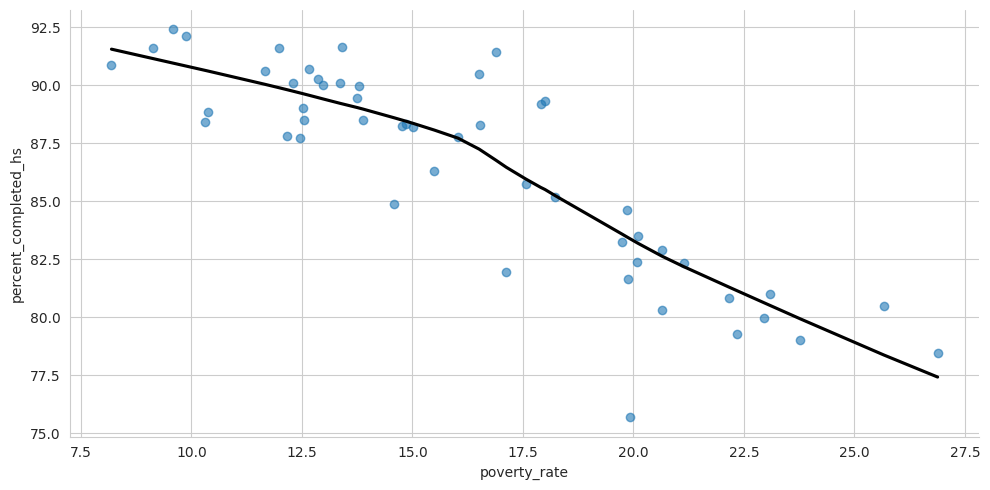

In [ ]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=merged_df_poverty_rate_and_high_school_graduation_rate,
               x='poverty_rate',
               y='percent_completed_hs',
               lowess=True,
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)

plt.show()

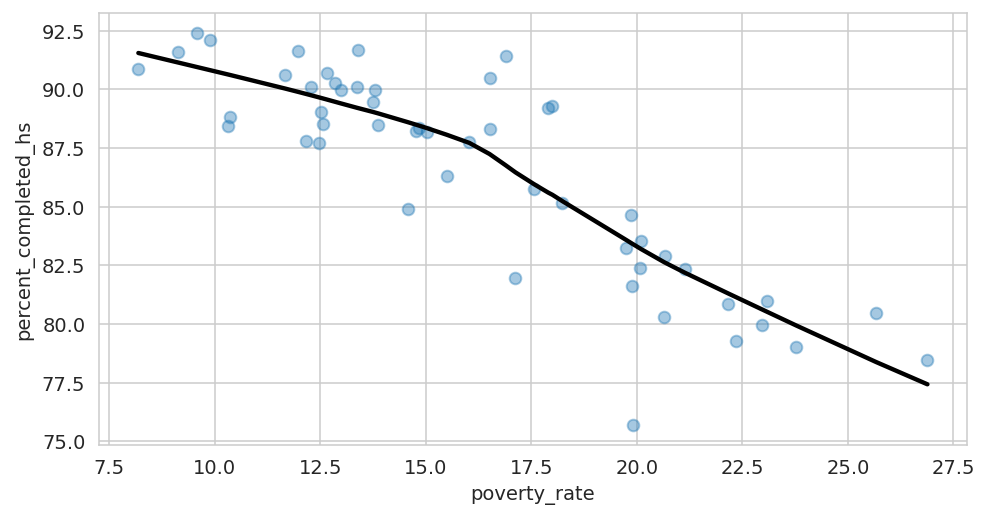

In [ ]:
plt.figure(figsize=(8,4), dpi=140)
with sns.axes_style("whitegrid"):
    sns.regplot(data=merged_df_poverty_rate_and_high_school_graduation_rate,
                x='poverty_rate',
                y='percent_completed_hs',
                lowess=True,
                scatter_kws = {'alpha': 0.4},
                line_kws={'color': 'black'})

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [ ]:
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4


In [ ]:
race_col_list = df_share_race_city.columns[2:]
race_col_list

Index(['share_white', 'share_black', 'share_native_american', 'share_asian',
       'share_hispanic'],
      dtype='object')

In [ ]:
for col in race_col_list:
  # print(col)
  df_share_race_city[col] = df_share_race_city[col].astype(str).str.replace("(X)", '0')
  df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')
  # print(df_share_race_city[col])
  # print("-------------------------------------------")

<ipython-input-55-39626f577f84>:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
df_share_race_city.isna().sum()

Geographic area           0
City                      0
share_white              20
share_black              20
share_native_american    20
share_asian              20
share_hispanic           20
dtype: int64

In [ ]:
df_share_race_city.fillna(0, inplace=True)

In [ ]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [ ]:
df_share_race_city.describe()

,share_white,share_black,share_native_american,share_asian,share_hispanic
count,"29,268.00","29,268.00","29,268.00","29,268.00","29,268.00"
mean,83.16,6.83,2.87,1.54,9.32
std,21.76,15.61,12.67,4.29,17.57
min,0.00,0.00,0.00,0.00,0.00
25%,78.50,0.10,0.10,0.00,1.20
50%,92.50,0.80,0.30,0.40,2.90
75%,96.90,4.20,0.90,1.20,8.00
max,100.00,100.00,100.00,67.10,100.00


In [ ]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [ ]:
race_by_state = df_share_race_city.groupby(['Geographic area'], as_index=False).aggregate({'share_white': 'mean',
                                                                                           'share_black': 'mean',
                                                                                           'share_native_american': 'mean',
                                                                                           'share_asian': 'mean',
                                                                                           'share_hispanic': 'mean'})
race_by_state

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


In [ ]:
race_by_state.rename(columns = {'Geographic area' : 'Geographic Area'}, inplace=True)
race_by_state.head()

,Geographic Area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51


In [ ]:
merged_df_race_by_state = pd.merge(us_states, race_by_state, on='Geographic Area')
merged_df_race_by_state

,State,Geographic Area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Alabama,AL,72.51,23.32,0.66,0.48,2.98
1,Alaska,AK,45.26,0.56,45.48,1.38,2.13
2,Arizona,AZ,59.93,0.95,28.59,0.73,20.14
3,Arkansas,AR,78.45,16.30,0.76,0.48,4.27
4,California,CA,71.54,2.68,1.72,5.54,29.51
5,Colorado,CO,87.77,0.92,1.62,1.15,17.90
6,Connecticut,CT,86.11,4.99,0.66,2.99,7.98
7,Delaware,DE,76.25,15.39,0.52,2.00,7.42
8,District of Columbia,DC,38.50,50.70,0.30,3.50,9.10
9,Florida,FL,78.67,13.37,0.46,1.62,16.53


In [ ]:
melted_df = pd.melt(merged_df_race_by_state,
                    id_vars='State',
                    value_vars=list(merged_df_race_by_state.columns[2:]),
                    var_name='Race',
                    value_name='Rate')

melted_df.sort_values('Rate', ascending=False, inplace=True)

melted_df

,State,Race,Rate
15,Iowa,share_white,96.71
45,Vermont,share_white,95.87
19,Maine,share_white,95.69
23,New Hampshire,share_white,95.68
48,West Virginia,share_white,95.04
...,...,...,...
71,Montana,share_black,0.23
131,Ohio,share_native_american,0.22
119,Kentucky,share_native_american,0.21
150,West Virginia,share_native_american,0.20


In [ ]:
melted_df[melted_df.State == 'Alabama']

,State,Race,Rate
0,Alabama,share_white,72.51
51,Alabama,share_black,23.32
204,Alabama,share_hispanic,2.98
102,Alabama,share_native_american,0.66
153,Alabama,share_asian,0.48


In [ ]:
fig = px.bar(melted_df, x="State", y="Rate", color="Race", title="Race Rate by US State")
fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.race.isna().sum()

195

In [ ]:
df_fatalities.fillna('None', inplace=True)

In [ ]:
death_by_race = df_fatalities.race.value_counts()
print(type(death_by_race))
death_by_race

<class 'pandas.core.series.Series'>


W       1201
B        618
H        423
None     195
A         39
N         31
O         28
Name: race, dtype: int64

In [ ]:
df_fatalities.race.count()

2535

In [ ]:
df_death_by_race = pd.DataFrame({'Abbreviation': death_by_race.index, 'Num_of_Death': death_by_race.values})
df_death_by_race

,Abbreviation,Num_of_Death
0,W,1201
1,B,618
2,H,423
3,None,195
4,A,39
5,N,31
6,O,28


In [ ]:
race = {'Race': ["White, non-Hispanic", "Black, non-Hispanic", "Asian", "Native American", "Hispanic", "Other", "unknown"],'Abbreviation': ["W", "B", "A", "N", "H", "O", "None"]}

df_race = pd.DataFrame(race)
df_race

,Race,Abbreviation
0,"White, non-Hispanic",W
1,"Black, non-Hispanic",B
2,Asian,A
3,Native American,N
4,Hispanic,H
5,Other,O
6,unknown,None


In [ ]:
merged_df_death_by_race = pd.merge(df_race, df_death_by_race, on='Abbreviation')
merged_df_death_by_race

,Race,Abbreviation,Num_of_Death
0,"White, non-Hispanic",W,1201
1,"Black, non-Hispanic",B,618
2,Asian,A,39
3,Native American,N,31
4,Hispanic,H,423
5,Other,O,28
6,unknown,None,195


In [ ]:
fig = px.pie(labels=merged_df_death_by_race.Race,
             values=merged_df_death_by_race.Num_of_Death,
             title="Death by Race",
             names=merged_df_death_by_race.Race,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,None,M,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.gender =  df_fatalities.gender.replace(['M'], 'Male')
df_fatalities.gender = df_fatalities.gender.replace(['F'], 'Female')
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,None,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
death_by_male_female = df_fatalities.gender.value_counts()
death_by_male_female

Male      2428
Female     107
Name: gender, dtype: int64

In [ ]:
df_fatalities.gender.count()

2535

In [ ]:
type(death_by_male_female)

pandas.core.series.Series

In [ ]:
df_death_by_male_female = death_by_male_female.to_frame()
df_death_by_male_female

,gender
Male,2428
Female,107


In [ ]:
df_death_by_male_female.reset_index(inplace=True)
df_death_by_male_female

,index,gender
0,Male,2428
1,Female,107


In [ ]:
df_death_by_male_female.rename(columns = {'index' : 'Gender', 'gender': 'Num'}, inplace=True)
df_death_by_male_female

,Gender,Num
0,Male,2428
1,Female,107


In [ ]:
fig = px.pie(labels=df_death_by_male_female.Gender,
             values=df_death_by_male_female.Num,
             title="Death by gender",
             names=df_death_by_male_female.Gender,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,None,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.age

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531    None
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: object

In [ ]:
df_fatalities.age = pd.to_numeric(df_fatalities.age, errors='coerce')
df_fatalities.age

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531     NaN
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: float64

In [ ]:
df_fatalities.age.isna().sum()

77

In [ ]:
age_manner_gender = df_fatalities[['age', 'manner_of_death', 'gender']]
age_manner_gender

,age,manner_of_death,gender
0,53.00,shot,Male
1,47.00,shot,Male
2,23.00,shot and Tasered,Male
3,32.00,shot,Male
4,39.00,shot,Male
...,...,...,...
2530,31.00,shot,Male
2531,NaN,shot,Male
2532,48.00,shot,Male
2533,28.00,shot,Male


In [ ]:
age_manner_gender.age.isna().sum()

77

In [ ]:
age_manner_gender.dropna(inplace=True)

<ipython-input-91-c85af37dd412>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
age_manner_gender

,age,manner_of_death,gender
0,53.00,shot,Male
1,47.00,shot,Male
2,23.00,shot and Tasered,Male
3,32.00,shot,Male
4,39.00,shot,Male
...,...,...,...
2529,32.00,shot,Male
2530,31.00,shot,Male
2532,48.00,shot,Male
2533,28.00,shot,Male


In [ ]:
age_manner_gender.age = age_manner_gender.age.astype(int)
age_manner_gender

<ipython-input-93-8a3c9824719d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,manner_of_death,gender
0,53,shot,Male
1,47,shot,Male
2,23,shot and Tasered,Male
3,32,shot,Male
4,39,shot,Male
...,...,...,...
2529,32,shot,Male
2530,31,shot,Male
2532,48,shot,Male
2533,28,shot,Male


In [ ]:
age_manner_gender.describe()

,age
count,"2,458.00"
mean,36.61
std,13.03
min,6.00
25%,26.00
50%,34.00
75%,45.00
max,91.00


In [ ]:
age_manner_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2458 entries, 0 to 2534
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2458 non-null   int64 
 1   manner_of_death  2458 non-null   object
 2   gender           2458 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.8+ KB


In [ ]:
age_manner_gender.age.value_counts()

25    103
36     91
31     85
24     83
29     83
     ... 
6       1
14      1
80      1
12      1
79      1
Name: age, Length: 73, dtype: int64

In [ ]:
age_manner_gender.manner_of_death.value_counts()

shot                2290
shot and Tasered     168
Name: manner_of_death, dtype: int64

In [ ]:
age_manner_gender.gender.value_counts()

Male      2354
Female     104
Name: gender, dtype: int64

In [ ]:
box = px.box(age_manner_gender,
             x='manner_of_death',
             y='age',
             color='manner_of_death',
             notched=True,
             points='all',
             title='Death of Age by Manner of Death')

box.show()

In [ ]:
box = px.box(age_manner_gender,
             x='manner_of_death',
             y='age',
             color='gender',
             notched=True,
             points='all',
             title='Death of Age by Manner of Death')

box.show()

In [ ]:
# Create a Box Plot Showing the Age and Manner of Death
# Break out the data by gender using df_fatalities. Is there a difference between men and women in the manner of death?

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.armed.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: armed
Non-Null Count  Dtype 
--------------  ----- 
2535 non-null   object
dtypes: object(1)
memory usage: 19.9+ KB


In [ ]:
df_fatalities.armed.describe()

count     2535
unique      69
top        gun
freq      1398
Name: armed, dtype: object

In [ ]:
df_fatalities.armed.nunique()

69

In [ ]:
df_fatalities[df_fatalities.armed == 'unarmed']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,Female,W,Burlington,IA,False,other,Not fleeing,True
17,36,Artago Damon Howard,08/01/15,shot,unarmed,36.00,Male,B,Strong,AR,False,attack,Not fleeing,False
62,352,Joshua Omar Garcia,26/01/15,shot,unarmed,24.00,Male,H,Tahoka,TX,False,other,Car,False
71,342,Ralph Willis,29/01/15,shot,unarmed,42.00,Male,W,Stillwater,OK,False,other,Foot,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,2604,Hayden J. Stutz,24/05/17,shot,unarmed,24.00,Male,W,Canton,OH,True,attack,Not fleeing,True
2425,2691,Armando Garcia-Muro,22/06/17,shot,unarmed,17.00,Male,H,Palmdale,CA,False,other,Not fleeing,False
2440,2717,Aaron Bailey,29/06/17,shot,unarmed,45.00,Male,B,Indianapolis,IN,False,other,Car,False
2494,2779,Justine Damond,15/07/17,shot,unarmed,40.00,Female,W,Minneapolis,MN,False,undetermined,Not fleeing,False


In [ ]:
df_fatalities[df_fatalities.armed == 'None']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
615,743,Benjamin Peter Ashley,15/08/15,shot,None,34.00,Male,B,Inyokern,CA,False,attack,Not fleeing,False
1551,1741,Jeffrey Smith,28/07/16,shot,None,47.00,Male,B,La Quinta,CA,False,other,Car,False
1715,1926,Clayton Eugene Baker,30/09/16,shot,None,38.00,Male,W,Groveton,TX,False,undetermined,Not fleeing,False
1732,1944,Larry Daniel Matthews,07/10/16,shot,None,57.00,Male,B,Macon,GA,False,other,Not fleeing,False
1825,2037,TK TK,11/11/16,shot and Tasered,None,NaN,Male,None,East Point,GA,False,undetermined,None,False
1975,2203,Gilbert Zambronio-Lovato,07/01/17,shot,None,38.00,Male,H,Albuquerque,NM,False,other,Not fleeing,False
2145,2711,Jose Olivares,28/02/17,shot,None,43.00,Male,None,Houma,LA,True,undetermined,Not fleeing,False
2469,2751,Brian Easley,07/07/17,shot,None,33.00,Male,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,None,40.00,Male,None,Lake View,SC,False,undetermined,None,False


In [ ]:
df_fatalities['armed'] = df_fatalities['armed'].replace(['None'], 'unarmed')
df_fatalities[df_fatalities.armed == 'unarmed']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,Female,W,Burlington,IA,False,other,Not fleeing,True
17,36,Artago Damon Howard,08/01/15,shot,unarmed,36.00,Male,B,Strong,AR,False,attack,Not fleeing,False
62,352,Joshua Omar Garcia,26/01/15,shot,unarmed,24.00,Male,H,Tahoka,TX,False,other,Car,False
71,342,Ralph Willis,29/01/15,shot,unarmed,42.00,Male,W,Stillwater,OK,False,other,Foot,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,2717,Aaron Bailey,29/06/17,shot,unarmed,45.00,Male,B,Indianapolis,IN,False,other,Car,False
2469,2751,Brian Easley,07/07/17,shot,unarmed,33.00,Male,B,Marietta,GA,True,undetermined,Not fleeing,False
2487,2772,James Gerald Davis,12/07/17,shot,unarmed,40.00,Male,None,Lake View,SC,False,undetermined,None,False
2494,2779,Justine Damond,15/07/17,shot,unarmed,40.00,Female,W,Minneapolis,MN,False,undetermined,Not fleeing,False


In [ ]:
df_fatalities[df_fatalities.armed == 'None']

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera


In [ ]:
by_armed = df_fatalities.armed.value_counts()
print(type(by_armed))
by_armed

<class 'pandas.core.series.Series'>


gun             1398
knife            373
unarmed          180
vehicle          177
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [ ]:
df_by_armed = by_armed.to_frame()
df_by_armed.reset_index(inplace=True)
df_by_armed.rename(columns = {'index': 'Type of weapon', 'armed':'Count'}, inplace=True)
df_by_armed

,Type of weapon,Count
0,gun,1398
1,knife,373
2,unarmed,180
3,vehicle,177
4,undetermined,117
...,...,...
63,hand torch,1
64,garden tool,1
65,pole,1
66,pick-axe,1


In [ ]:
for weapon in df_by_armed['Type of weapon']:
  print(weapon)

gun
knife
unarmed
vehicle
undetermined
toy weapon
machete
unknown weapon
ax
Taser
baseball bat
sword
hammer
box cutter
metal pipe
hatchet
crossbow
gun and knife
blunt object
screwdriver
guns and explosives
rock
metal stick
scissors
beer bottle
hatchet and gun
piece of wood
chain saw
pipe
brick
shovel
metal object
metal pole
baton
meat cleaver
sharp object
metal rake
motorcycle
glass shard
baseball bat and bottle
crowbar
oar
fireworks
machete and gun
bayonet
pitchfork
tire iron
pole and knife
air conditioner
bean-bag gun
spear
flashlight
nail gun
lawn mower blade
flagpole
cordless drill
metal hand tool
carjack
chain
contractor's level
stapler
baseball bat and fireplace poker
straight edge razor
hand torch
garden tool
pole
pick-axe
pen


In [ ]:
df_by_armed

,Type of weapon,Count
0,gun,1398
1,knife,373
2,unarmed,180
3,vehicle,177
4,undetermined,117
...,...,...
63,hand torch,1
64,garden tool,1
65,pole,1
66,pick-axe,1


In [ ]:
fig = px.pie(labels=df_by_armed['Type of weapon'],
             values=df_by_armed.Count,
             title="Were People Armed?",
             names=df_by_armed['Type of weapon'],
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()


In [ ]:
# Were People Armed?

# In what percentage of police killings were people armed
# Create chart that show what kind of weapon (if any) the deceased was carrying.
# How many of the people killed by police were armed with guns versus unarmed?

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.age

0      53.00
1      47.00
2      23.00
3      32.00
4      39.00
        ... 
2530   31.00
2531     NaN
2532   48.00
2533   28.00
2534   32.00
Name: age, Length: 2535, dtype: float64

In [ ]:
df_fatalities.age.isna().values.any()

True

In [ ]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2535 entries, 0 to 2534
Series name: age
Non-Null Count  Dtype  
--------------  -----  
2458 non-null   float64
dtypes: float64(1)
memory usage: 19.9 KB


In [ ]:
df_fatalities.describe()

,id,age
count,"2,535.00","2,458.00"
mean,"1,445.73",36.61
std,794.26,13.03
min,3.00,6.00
25%,768.50,26.00
50%,"1,453.00",34.00
75%,"2,126.50",45.00
max,"2,822.00",91.00


In [ ]:
df_age = df_fatalities.dropna()
df_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,Male,None,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_age.isna().values.any()

False

In [ ]:
df_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,Male,None,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_age.age.info()

<class 'pandas.core.series.Series'>
Int64Index: 2458 entries, 0 to 2534
Series name: age
Non-Null Count  Dtype  
--------------  -----  
2458 non-null   float64
dtypes: float64(1)
memory usage: 38.4 KB


In [ ]:
df_age.age.describe()

count   2,458.00
mean       36.61
std        13.03
min         6.00
25%        26.00
50%        34.00
75%        45.00
max        91.00
Name: age, dtype: float64

In [ ]:
age_equal_to_or_older_than_25 = df_age[df_age.age <= 25].count().age
print(age_equal_to_or_older_than_25)

age_younger_than_25 = df_age[df_age.age > 25].count().age
print(age_younger_than_25)

553
1905


In [ ]:
data = [['Age >= 25', age_equal_to_or_older_than_25], ['Age < 25', age_younger_than_25]]
df = pd.DataFrame(data, columns=['Age', 'Num'])
df

,Age,Num
0,Age >= 25,553
1,Age < 25,1905


In [ ]:
fig = px.pie(labels=df.Age,
             values=df.Num,
             title="How Old Were the People Killed?",
             names=df.Age,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()

In [ ]:
# How Old Were the People Killed?
# Work out what percentage of people killed were under 25 years old.

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [ ]:
df_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,Male,None,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
fig = px.histogram(df_age,
                   x="age")
fig.show()

In [ ]:
df_age.age.describe()

count   2,458.00
mean       36.61
std        13.03
min         6.00
25%        26.00
50%        34.00
75%        45.00
max        91.00
Name: age, dtype: float64

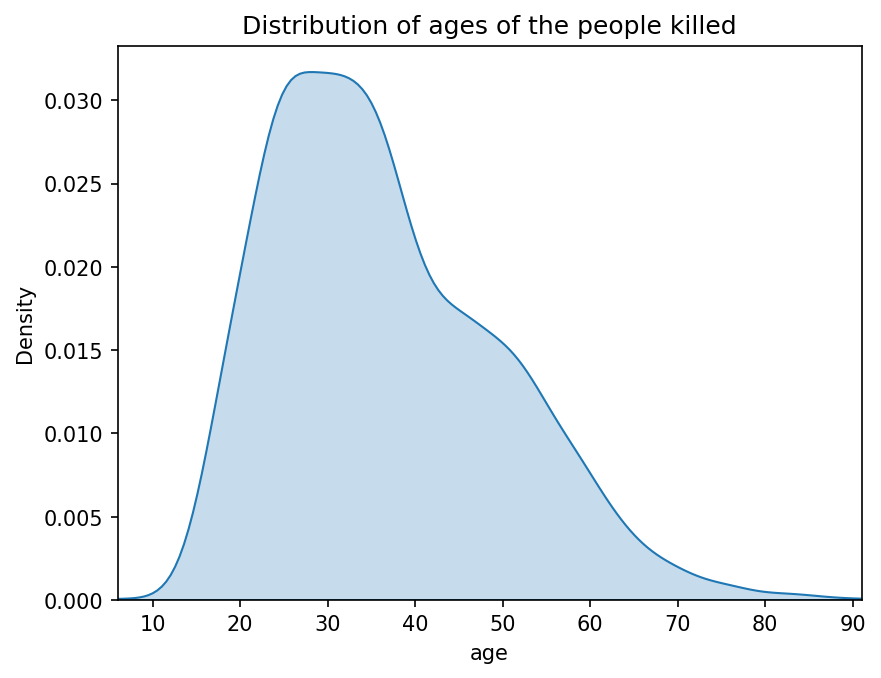

In [ ]:
plt.figure(dpi=150)
sns.kdeplot(df_age.age,
            fill=True)
plt.title('Distribution of ages of the people killed')
plt.xlim(6, 91)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [ ]:
df_age

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,Male,None,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


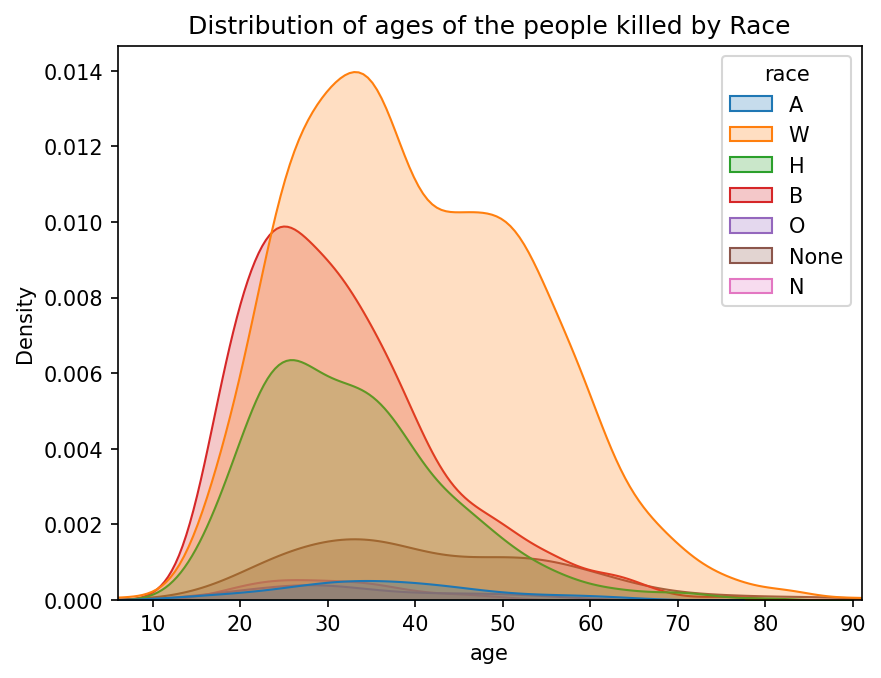

In [ ]:
plt.figure(dpi=150)
sns.kdeplot(df_age,
            x="age",
            hue="race",
            fill=True)
plt.title('Distribution of ages of the people killed by Race')
plt.xlim(6, 91)
plt.show()

In [ ]:
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown


# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [ ]:
# Already done above.

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
mental = df_fatalities.signs_of_mental_illness.value_counts()
print(type(mental))
mental

<class 'pandas.core.series.Series'>


False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

In [ ]:
mental_df = pd.DataFrame({'mental_illness':mental.index, 'count':mental.values})
print(type(mental_df))
mental_df

<class 'pandas.core.frame.DataFrame'>


,mental_illness,count
0,False,1902
1,True,633


In [ ]:
fig = px.pie(labels=mental_df.mental_illness,
             values=mental_df['count'],
             title="What percentage of people killed by police have been diagnosed with a mental illness?",
             names=mental_df.mental_illness,
             hole=0.4)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent+label')

fig.show()


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
dangerous_cities_top_10 = df_fatalities.city.value_counts()[:10]
dangerous_cities_top_10

Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: city, dtype: int64

In [ ]:
df_dangerous_cities_top_10 = pd.DataFrame({'City':dangerous_cities_top_10.index, 'Number_of_death_by_police':dangerous_cities_top_10.values})
df_dangerous_cities_top_10

,City,Number_of_death_by_police
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [ ]:
df_dangerous_cities_top_10.Number_of_death_by_police.sum()

233

In [ ]:
fig = px.bar(df_dangerous_cities_top_10,
             x="City",
             y="Number_of_death_by_police",
             color="Number_of_death_by_police",
             title="Top 10 cities with the most police killings")
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
top_10_cities_list = [city for city in df_dangerous_cities_top_10.City]
top_10_cities_list

['Los Angeles',
 'Phoenix',
 'Houston',
 'Chicago',
 'Las Vegas',
 'San Antonio',
 'Columbus',
 'Austin',
 'Miami',
 'St. Louis']

In [ ]:
df_fatalities_top_10_cities = df_fatalities.loc[df_fatalities['city'].isin(top_10_cities_list)]
df_fatalities_top_10_cities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,Male,B,Columbus,OH,True,other,Not fleeing,False
40,75,Pablo Meza,17/01/15,shot,gun,24.00,Male,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.00,Male,B,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.00,Male,W,Austin,TX,True,attack,Not fleeing,False
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.00,Male,N,Phoenix,AZ,False,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2793,Isaiah Perkins,20/07/17,shot,gun,27.00,Male,B,St. Louis,MO,False,attack,Car,False
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.00,Male,W,St. Louis,MO,True,attack,Car,False
2520,2804,TK TK,26/07/17,shot,gun,35.00,Male,None,Phoenix,AZ,False,attack,Other,False
2521,2806,TK TK,26/07/17,shot,gun,NaN,Male,None,San Antonio,TX,False,attack,Not fleeing,False


In [ ]:
df_top_10_cities_by_race = df_fatalities_top_10_cities.groupby(["city", "race"], as_index=False).agg({'id': pd.Series.count})
df_top_10_cities_by_race.rename(columns = {'id': 'num_of_death',}, inplace=True)
df_top_10_cities_by_race.sort_values('num_of_death', ascending=False, inplace=True)
df_top_10_cities_by_race

,city,race,num_of_death
3,Chicago,B,21
23,Los Angeles,H,19
12,Houston,B,15
2,Austin,W,13
36,San Antonio,H,12
34,Phoenix,W,12
39,St. Louis,B,11
7,Columbus,B,11
31,Phoenix,H,11
22,Los Angeles,B,10


In [ ]:
fig = px.bar(df_top_10_cities_by_race,
             x="city",
             y="num_of_death",
             color="race",
             title="Top 10 cities with the most police killings by Race")
fig.show()

In [ ]:
# W: White, non-Hispanic
# B: Black, non-Hispanic
# A: Asian
# N: Native American
# H: Hispanic
# O: Other
# None: unknown

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities_by_state = df_fatalities.groupby(["state"], as_index=False).agg({'id': pd.Series.count})
df_fatalities_by_state.rename(columns = {'state':'code', 'id': 'num_of_death',}, inplace=True)
df_fatalities_by_state.sort_values('num_of_death', ascending=False, inplace=True)
df_fatalities_by_state

,code,num_of_death
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79
36,OK,78
5,CO,74
10,GA,70
27,NC,69
24,MO,64


In [ ]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [ ]:
code_swap = {v: k for k, v in code.items()}
code_swap

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming

In [ ]:
df_fatalities_by_state['state'] = df_fatalities_by_state['code'].map(code_swap)
df_fatalities_by_state = df_fatalities_by_state[['state', 'code', 'num_of_death']]
df_fatalities_by_state

,state,code,num_of_death
4,California,CA,424
43,Texas,TX,225
9,Florida,FL,154
3,Arizona,AZ,118
35,Ohio,OH,79
36,Oklahoma,OK,78
5,Colorado,CO,74
10,Georgia,GA,70
27,North Carolina,NC,69
24,Missouri,MO,64


In [ ]:
fig = px.choropleth(df_fatalities_by_state,
                    locations='code',
                    color='num_of_death',
                    hover_name='state',
                    locationmode='USA-states',
                    scope='usa')

fig.update_layout(title='Police Killings by US State')

fig.show()

In [ ]:
# Create a Choropleth Map of Police Killings by US State
# Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
bar = px.bar(x = merged_df_poverty_rate_by_state.State,
             y = merged_df_poverty_rate_by_state.poverty_rate,
             title='Poverty Rate by US State')

bar.update_layout(xaxis_title='State',
                  yaxis_title='Poverty Rate')

bar.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
df_fatalities.date

0      2015-02-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-04-01
          ...    
2530   2017-07-28
2531   2017-07-28
2532   2017-07-29
2533   2017-07-31
2534   2017-07-31
Name: date, Length: 2535, dtype: datetime64[ns]

In [184]:
year_month = [date.strftime("%Y-%m") for date in df_fatalities.date]
df_fatalities['year_month'] = year_month
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year_month
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,Male,A,Shelton,WA,True,attack,Not fleeing,False,2015-02
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,Male,W,Aloha,OR,False,attack,Not fleeing,False,2015-02
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,Male,H,Wichita,KS,False,other,Not fleeing,False,2015-03
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,Male,W,San Francisco,CA,True,attack,Not fleeing,False,2015-04
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,Male,H,Evans,CO,False,attack,Not fleeing,False,2015-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,2017-07-28,shot,gun,31.00,Male,None,Kansas City,MO,False,attack,Not fleeing,False,2017-07
2531,2813,TK TK,2017-07-28,shot,vehicle,NaN,Male,None,Albuquerque,NM,False,attack,Car,False,2017-07
2532,2818,Dennis W. Robinson,2017-07-29,shot,gun,48.00,Male,None,Melba,ID,False,attack,Car,False,2017-07
2533,2817,Isaiah Tucker,2017-07-31,shot,vehicle,28.00,Male,B,Oshkosh,WI,False,attack,Car,True,2017-07


In [186]:
death_by_month = df_fatalities.groupby(['year_month'], as_index=False).agg({'id':pd.Series.count})
death_by_month.rename(columns = {'year_month':'date', 'id': 'num_of_death',}, inplace=True)
death_by_month

,date,num_of_death
0,2015-01,70
1,2015-02,78
2,2015-03,87
3,2015-04,88
4,2015-05,85
5,2015-06,68
6,2015-07,85
7,2015-08,86
8,2015-09,90
9,2015-10,89


In [187]:
g_bar = px.bar(death_by_month,
               x='date',
               y='num_of_death',
               title='Number of Police Killings Over Time',
               color='num_of_death')

g_bar.show()

In [ ]:
# Number of Police Killings Over Time
# Analyse the Number of Police Killings over Time. Is there a trend in the data?

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).